In [1]:
%matplotlib inline


# Clustering methods comparison

This example demonstrates the implemented clustering methods on one example dataset for a direct comparison.


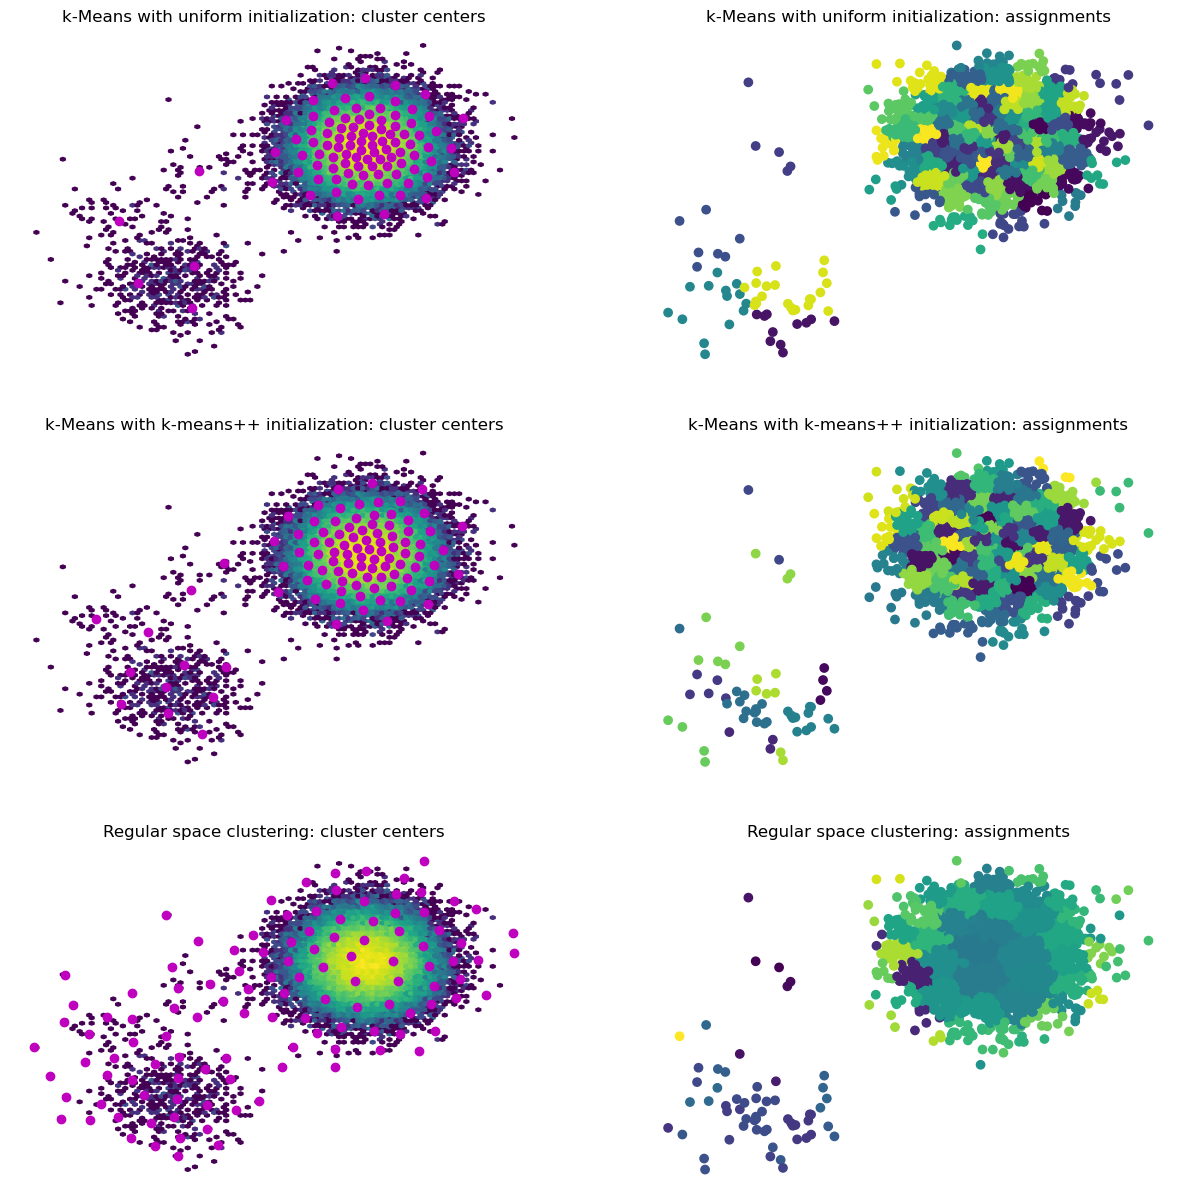

In [3]:
import matplotlib.pyplot as plt  # matplotlib for plotting
import numpy as np

from sklearn.mixture import GaussianMixture  # for example data generation

from deeptime.clustering import KMeans, RegularSpace

rnd = np.random.RandomState(seed=17)  # create a random state with fixed seed for reproducibility

n_components = 5
gmm = GaussianMixture(n_components=n_components, random_state=rnd, covariance_type='diag')  # create a GMM object

gmm.weights_ = np.array([10., 100., 10000., 10., 10.])
gmm.weights_ /= gmm.weights_.sum()  # weights need to form a probability distribution
gmm.means_ = rnd.uniform(low=-20., high=20., size=(n_components, 2))  # centers are random uniform
gmm.covariances_ = rnd.uniform(low=15., high=18., size=(n_components, 2))  # same for covariance matrices

samples, labels = gmm.sample(50000)  # generate data

estimators = [
    ('k-Means with uniform initialization', KMeans(
        n_clusters=100,  # place 100 cluster centers
        init_strategy='uniform',  # uniform initialization strategy
        fixed_seed=13,
        n_jobs=8)
     ),
    ('k-Means with k-means++ initialization', KMeans(
        n_clusters=100,  # place 100 cluster centers
        init_strategy='kmeans++',  # uniform initialization strategy
        fixed_seed=13,
        n_jobs=8)
     ),
    ('Regular space clustering', RegularSpace(
        dmin=3,  # minimum distance between cluster centers
        max_centers=300,  # maximum number of cluster centers
        n_jobs=8)
     )
]

f, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, (label, estimator) in enumerate(estimators):
    clustering = estimator.fit(samples).fetch_model()
    ax1 = axes[i][0]
    ax2 = axes[i][1]

    ax1.hexbin(*samples.T, bins='log')
    ax1.scatter(*clustering.cluster_centers.T, marker='o', c='m')
    ax1.axis('off')
    ax1.set_title(label + ': cluster centers')

    ax2.scatter(*samples[::10].T, c=clustering.transform(samples)[::10])
    ax2.axis('off')
    ax2.set_title(label + ': assignments')